In [ ]:
# Obtener los precios promedio mensual de los últimos 3 años de las Criptomonedas, eliminar los valores nulos y luego armar un DF

In [26]:
import requests
import json
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear un df con los precios diarios
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Ubicar el timestamp como índice del DataFrame
    df.set_index('timestamp', inplace=True)

    # Agrupar los precios mensualmente y calcular el precio promedio de cada uno
    df_mensual = df.resample('M').mean()

    return df_mensual

# URLs de las criptomonedas seleccionadas
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=730'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=730'),
    ('uniswap', 'https://api.coingecko.com/api/v3/coins/uniswap/market_chart?vs_currency=usd&days=1825'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=730'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=730'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=730'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=730'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=730'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=730'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=730')
]

# Crear un DataFrame con todas las monedas combinadas
df_Combinado = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    df_Combinado = pd.concat([df_Combinado, df], axis=1)

# Redondear a 2 decimales
combidf_Combinadoned_df = df_Combinado.round(2)

# Eliminar los valores nulos
df_Combinado.dropna(inplace=True)

# Guardar el archivo como CSV 
df_Combinado.to_csv('Precios_Mensuales_3años.csv')

print(df_Combinado)

               ethereum       bitcoin    uniswap    tether  binancecoin  \
timestamp                                                                 
2021-08-31  3228.946611  48554.741134  26.928440  1.000981   481.134102   
2021-09-30  3352.656358  46085.361452  24.495614  1.001168   412.077698   
2021-10-31  3785.631279  57485.343481  25.514629  1.002129   458.961103   
2021-11-30  4442.222896  60984.688480  23.369535  1.002706   601.480230   
2021-12-31  4084.498984  49722.381008  17.075423  1.000358   556.378557   
2022-01-31  3091.383404  41413.915807  14.722240  1.001156   447.141551   
2022-02-28  2863.424988  40648.221656  10.513549  1.001497   394.347893   
2022-03-31  2864.979345  41897.670006   9.595071  1.000110   396.295928   
2022-04-30  3117.465388  41716.105717   9.655553  1.000558   417.400297   
2022-05-31  2217.005892  31945.262299   5.835437  1.000655   327.159547   
2022-06-30  1413.154774  24801.550994   4.832825  1.000535   253.331634   
2022-07-31  1341.121345  

In [ ]:
#Grafico y comparo la evolución histórica de los precios, enfocándome en bitcoin. Cómo podemos apreciar en el gráfico siguiente, esta criptomoneda
#decrece en valor durante los ultimos 3 años haciendo que sea inconveniente sostener una inversión a largo plazo. Sin embargo, si tomamos períodos
#semanales o mensuales, puede representar una buena oportunidad para inversión y generar ganancias.

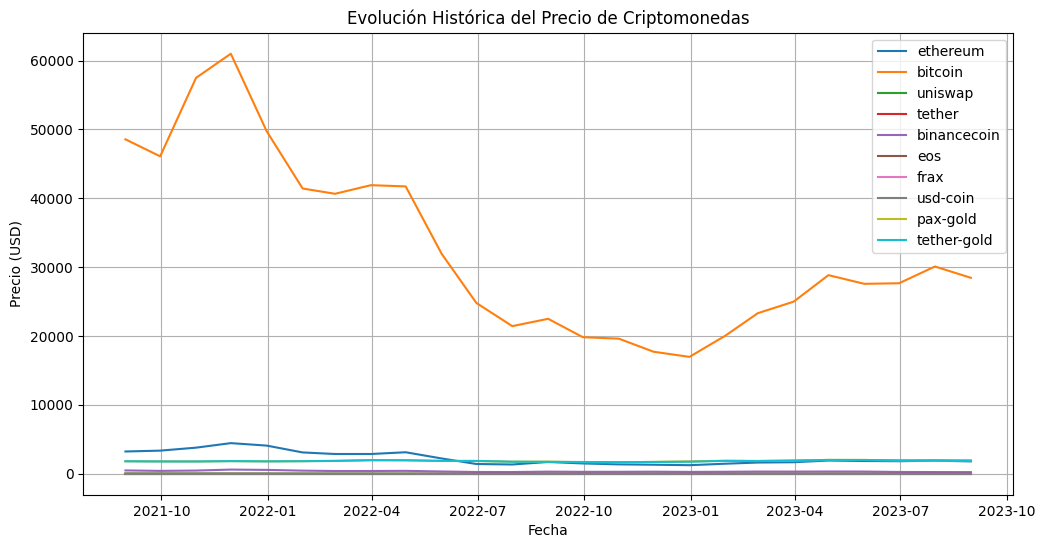

In [27]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para crear el DataFrame y procesar los datos) ...

# Crear un gráfico de líneas para comparar la evolución de los precios
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico

for column in df_Combinado.columns:
    plt.plot(df_Combinado.index, df_Combinado[column], label=column)

plt.title('Evolución Histórica del Precio de Criptomonedas')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Grafico la evolución histórica sin tomar en cuenta Bitcoin, para evitar el outlier. En este gráfico se pueden sacar las mismas conclusiones 
#para Ethereum y también que las monedas respaldadas en oro como Pax-Gold o Tether-Gold o Frax pueden ser una buena inversión a corto plazo
#diferenciándose en que dan menores ganancias pero más estabilidad a lo largo del período graficado.

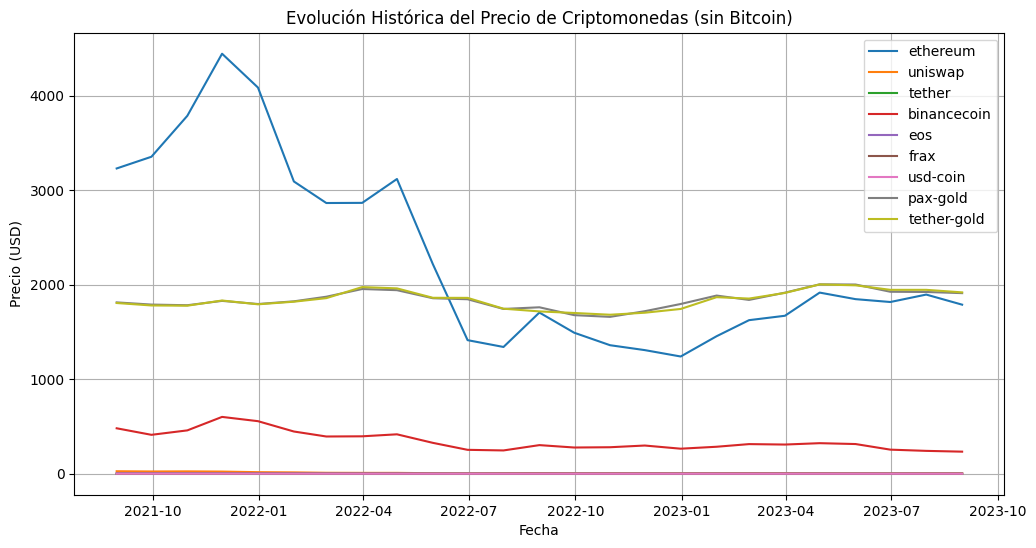

In [28]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para crear el DataFrame y procesar los datos) ...

# Eliminar la columna de Bitcoin del DataFrame
df_Combinado.drop(columns=['bitcoin'], inplace=True)

# Crear un gráfico de líneas para comparar la evolución de los precios sin Bitcoin
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico

for column in df_Combinado.columns:
    plt.plot(df_Combinado.index, df_Combinado[column], label=column)

plt.title('Evolución Histórica del Precio de Criptomonedas (sin Bitcoin)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Calculo el precio inicial y final de cada criptomoneda  y saco el porcentaje

In [41]:
import requests
import json
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear un df con los precios diarios
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Ubicar el timestamp como índice del DataFrame
    df.set_index('timestamp', inplace=True)

    return df

# URLs de las criptomonedas seleccionadas
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=730'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=730'),
    ('uniswap', 'https://api.coingecko.com/api/v3/coins/uniswap/market_chart?vs_currency=usd&days=1825'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=730'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=730'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=730'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=730'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=730'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=730'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=730')
]

# Crear un DataFrame con los precios iniciales y finales
df_Precios = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    
    if not df.empty:
        first_price = df.iloc[0][currency]
        last_price = df.iloc[-1][currency]
        growth_percentage = ((last_price - first_price) / first_price) * 100
        df_Precios[currency] = [first_price, last_price, growth_percentage]

# Renombrar las filas del DataFrame
df_Precios.index = ['Precio Inicial', 'Precio Final', 'Porcentaje de Crecimiento']

# Mostrar los precios iniciales, finales y porcentajes
print(df_Precios)

                              ethereum       bitcoin    uniswap    tether  \
Precio Inicial             3320.409170  49250.544870   3.443832  1.005613   
Precio Final               1634.713394  25674.436760   4.734216  1.000128   
Porcentaje de Crecimiento   -50.767712    -47.869741  37.469414 -0.545489   

                           binancecoin        eos      frax  usd-coin  \
Precio Inicial               448.54605   5.597297  0.999299  0.999911   
Precio Final                 206.82678   0.581412  0.997339  0.999737   
Porcentaje de Crecimiento    -53.88951 -89.612620 -0.196166 -0.017394   

                              pax-gold  tether-gold  
Precio Inicial             1804.118222  1803.868738  
Precio Final               1896.876404  1904.888201  
Porcentaje de Crecimiento     5.141469     5.600156  


In [ ]:
# Se muestra el crecimiento y decrecimiento porcentual. En este gráfico, observamos que en el período de 3 años las monedas respaldadas por oro
#subieron significativamente su valor porcentual, al igual que Uniswap. El resto decreció notoriamente. 

C:\Users\Fede\AppData\Local\Temp\ipykernel_13324\385496214.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Precios = df_Precios.append({'Criptomoneda': currency, 'Porcentaje de Crecimiento': growth_percentage}, ignore_index=True)
C:\Users\Fede\AppData\Local\Temp\ipykernel_13324\385496214.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Precios = df_Precios.append({'Criptomoneda': currency, 'Porcentaje de Crecimiento': growth_percentage}, ignore_index=True)
C:\Users\Fede\AppData\Local\Temp\ipykernel_13324\385496214.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_Precios = df_Precios.append({'Criptomoneda': currency, 'Porcentaje de Crecimiento': growth_percentage}, ignore_index=True)
C:\Users\Fede\AppDa

  Criptomoneda  Porcentaje de Crecimiento
2      uniswap                  37.469414
9  tether-gold                   5.600156
8     pax-gold                   5.141469
7     usd-coin                  -0.017394
6         frax                  -0.196166
3       tether                  -0.545489
1      bitcoin                 -47.869741
0     ethereum                 -50.767712
4  binancecoin                 -56.937627
5          eos                 -89.612620


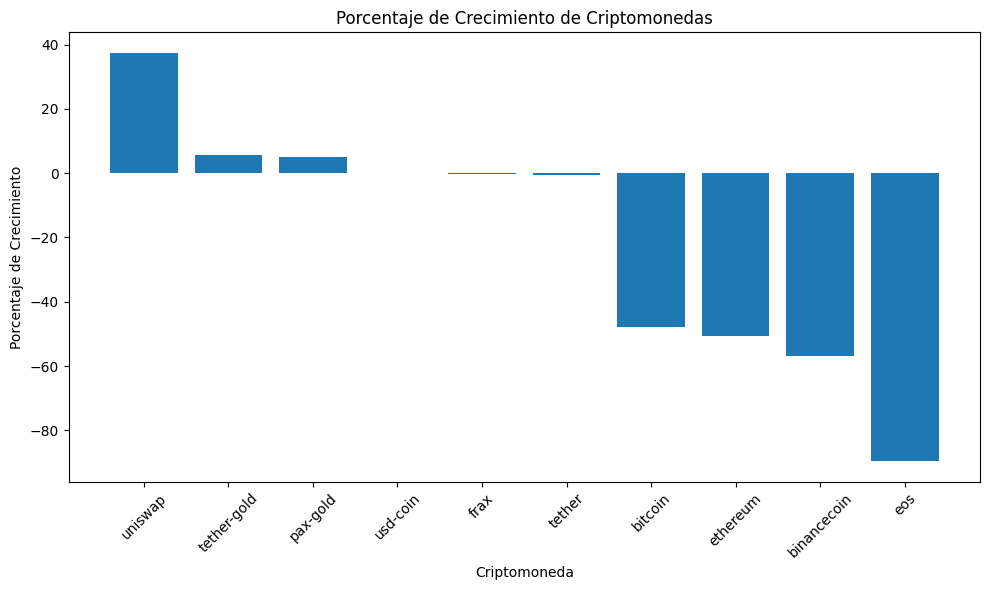

In [44]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear un df con los precios diarios
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Ubicar el timestamp como índice del DataFrame
    df.set_index('timestamp', inplace=True)

    return df

# URLs de las criptomonedas seleccionadas
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=730'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=730'),
    ('uniswap', 'https://api.coingecko.com/api/v3/coins/uniswap/market_chart?vs_currency=usd&days=1825'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=730'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=730'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=730'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=730'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=730'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=730'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=730')
    # Agrega aquí más criptomonedas si lo deseas
]

# Crear un DataFrame con los precios iniciales y finales
df_Precios = pd.DataFrame(columns=['Criptomoneda', 'Porcentaje de Crecimiento'])

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    
    if not df.empty:
        first_price = df.iloc[0][currency]
        last_price = df.iloc[-1][currency]
        growth_percentage = ((last_price - first_price) / first_price) * 100
        df_Precios = df_Precios.append({'Criptomoneda': currency, 'Porcentaje de Crecimiento': growth_percentage}, ignore_index=True)

# Ordenar el DataFrame de mayor a menor porcentaje de crecimiento
df_Precios = df_Precios.sort_values(by='Porcentaje de Crecimiento', ascending=False)

# Mostrar los porcentajes de crecimiento
print(df_Precios)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_Precios['Criptomoneda'], df_Precios['Porcentaje de Crecimiento'])
plt.title('Porcentaje de Crecimiento de Criptomonedas')
plt.xlabel('Criptomoneda')
plt.ylabel('Porcentaje de Crecimiento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Busco la variación de los precios semanales del 2022 hasta la actualidad 

In [46]:
import requests
import json
import pandas as pd

def crear_dataframe(url, currency):
    response = requests.get(url)
    data = json.loads(response.text)

    # Crear DataFrame con los precios semanales
    df = pd.DataFrame(data['prices'], columns=['timestamp', currency])

    # Convertir el timestamp a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Redondear a 2 decimales
    df.set_index('timestamp', inplace=True)

    # Agrupar los precios semanalmente y calcular el precio promedio de cada uno
    df_semanal = df.resample('W').mean()

    return df_semanal

# URLs of cryptocurrencies
cryptos = [
    ('ethereum', 'https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=365'),
    ('bitcoin', 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=365'),
    ('dai', 'https://api.coingecko.com/api/v3/coins/dai/market_chart?vs_currency=usd&days=365'),
    ('tether', 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=365'),
    ('binancecoin', 'https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=365'),
    ('eos', 'https://api.coingecko.com/api/v3/coins/eos/market_chart?vs_currency=usd&days=365'),
    ('frax', 'https://api.coingecko.com/api/v3/coins/frax/market_chart?vs_currency=usd&days=365'),
    ('usd-coin', 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=365'),
    ('pax-gold', 'https://api.coingecko.com/api/v3/coins/pax-gold/market_chart?vs_currency=usd&days=365'),
    ('tether-gold', 'https://api.coingecko.com/api/v3/coins/tether-gold/market_chart?vs_currency=usd&days=365')
]

# Crear un DataFrame con todas las monedas combinadas
df_combinadoS = pd.DataFrame()

for currency, url in cryptos:
    df = crear_dataframe(url, currency)
    df_combinadoS = pd.concat([df_combinadoS, df], axis=1)

# Redondear a 2 decimales
df_combinadoS = df_combinadoS.round(2)

# Eliminar los valores nulos
df_combinadoS.dropna(inplace=True)

# Guardar el Df en un CSV
df_combinadoS.to_csv('Precios_Semanales.csv')

print(df_combinadoS)



            ethereum   bitcoin   dai  tether  binancecoin   eos  frax  \
timestamp                                                               
2022-08-28   1605.38  20983.44  1.00    1.00       290.99  1.69  1.00   
2022-09-04   1541.67  19958.14  1.00    1.00       279.60  1.46  1.00   
2022-09-11   1646.27  20042.23  1.00    1.00       281.32  1.59  1.00   
2022-09-18   1579.35  20588.37  1.00    1.00       281.33  1.51  1.00   
2022-09-25   1324.46  19159.04  1.00    1.00       271.11  1.25  1.00   
2022-10-02   1325.22  19277.92  1.00    1.00       279.18  1.18  1.00   
2022-10-09   1329.92  19716.76  1.00    1.00       286.49  1.16  1.00   
2022-10-16   1292.71  19208.19  1.00    1.00       271.74  1.05  1.00   
2022-10-23   1304.64  19245.91  1.00    1.00       271.79  1.05  1.00   
2022-10-30   1489.71  20204.50  1.00    1.00       287.63  1.11  1.00   
2022-11-06   1581.02  20630.76  1.00    1.00       330.87  1.15  1.00   
2022-11-13   1346.21  18183.24  1.00    1.00       

In [ ]:
# Evolución del precio semanal de Bitcoin. Este gráfico nos demuestra como esta moneda puede ser atractiva para inversiones a corto plazo.

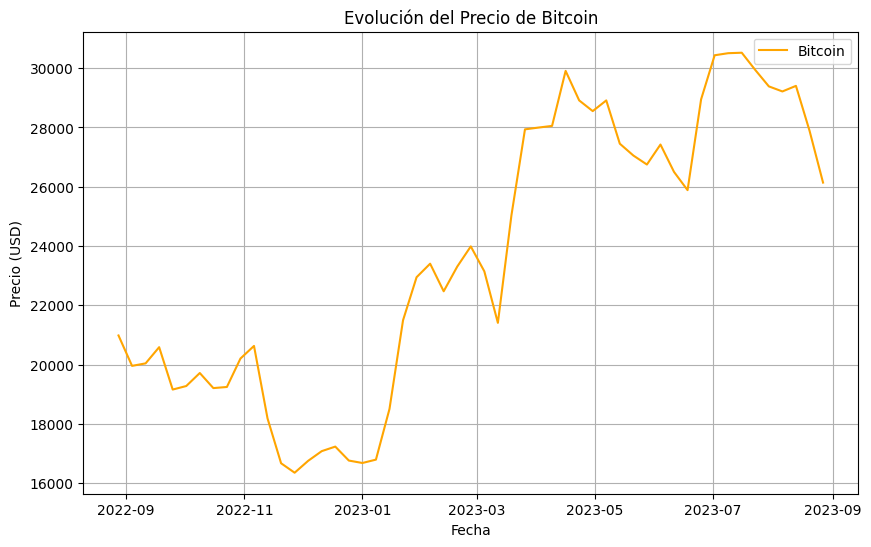

In [47]:
import matplotlib.pyplot as plt

# Cargar el DataFrame de precios semanales
df_combinadoS = pd.read_csv('Precios_Semanales.csv', index_col='timestamp', parse_dates=True)

# Crear el gráfico de evolución del precio de Bitcoin
plt.figure(figsize=(10, 6))
plt.plot(df_combinadoS.index, df_combinadoS['bitcoin'], label='Bitcoin', color='orange')
plt.title('Evolución del Precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evolucion de precios semanales de las otras criptomonedas en el período de un año: Este gráfico nos permite observar que aunque con menor
#capacidad de ganancia, las criptomonedas respaldadas en oro y Ethereum proporcionan una buena inversión a corto plazo, mientras que el resto
#pueden garantizar un respaldo estable y seguro alternativo para inversores de países con gran cantidad de inflación, como Argentina.

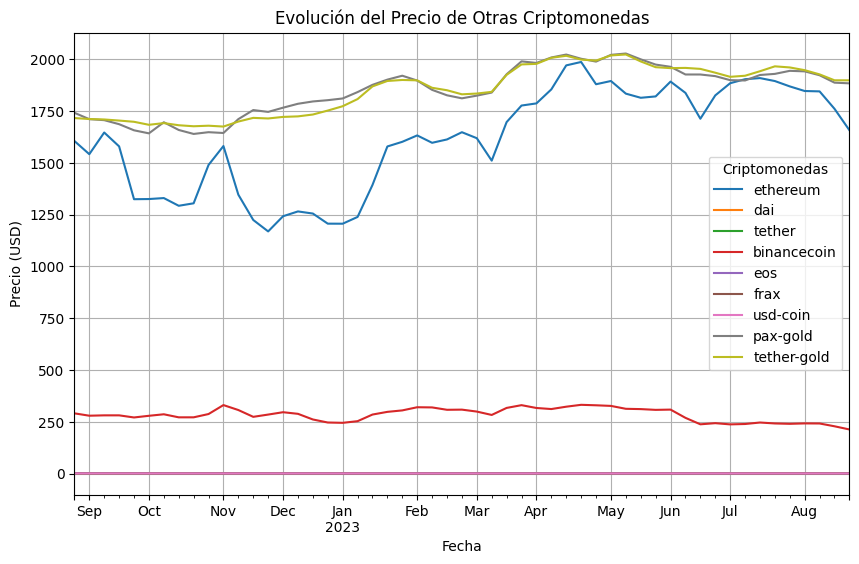

In [48]:
# Crear un DataFrame sin el precio de Bitcoin
df_combinadoS_sin_bitcoin = df_combinadoS.drop(columns=['bitcoin'])

# Crear el gráfico de evolución del precio de las demás criptomonedas
plt.figure(figsize=(10, 6))
df_combinadoS_sin_bitcoin.plot(ax=plt.gca())
plt.title('Evolución del Precio de Otras Criptomonedas')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend(title='Criptomonedas')
plt.grid(True)
plt.show()

In [ ]:
#Obtener el Volumen actual de las criptomonedas seleccionadas

In [53]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de CoinGeckoAPI class
cg = CoinGeckoAPI()

# Obtener el volumen de las últimas 24 horas de las criptomonedas
data = cg.get_price(ids=['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold'], vs_currencies='usd', include_24hr_vol=True)

# Convertir el diccionario a un df de Pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Guardar el Df en un CSV
df.to_csv('Volumen_Actual.csv')

# Show the dataframe
print(df)

                      usd   usd_24h_vol
binancecoin    214.810000  8.353124e+08
bitcoin      25982.000000  1.429216e+10
eos              0.581582  1.032351e+08
ethereum      1642.890000  1.201173e+10
frax             0.996832  5.662711e+06
pax-gold      1896.710000  8.301622e+06
tether           0.999636  2.365988e+10
tether-gold   1903.670000  4.023995e+06
uniswap          4.710000  1.354046e+08
usd-coin         0.999950  6.376033e+09


In [ ]:
#Volumen de negociación de las últimas 24 hs de las criptomonedas. Observamos que para tether, bitcoin, ethereum y usd-coin se percibe un Un alto 
#volumen de negociación, lo que indica que hay muchos compradores y vendedores activos en el mercado y esto puede ser una señal de que 
# actualmente son populares y tienen un valor aceptado por el mercado.

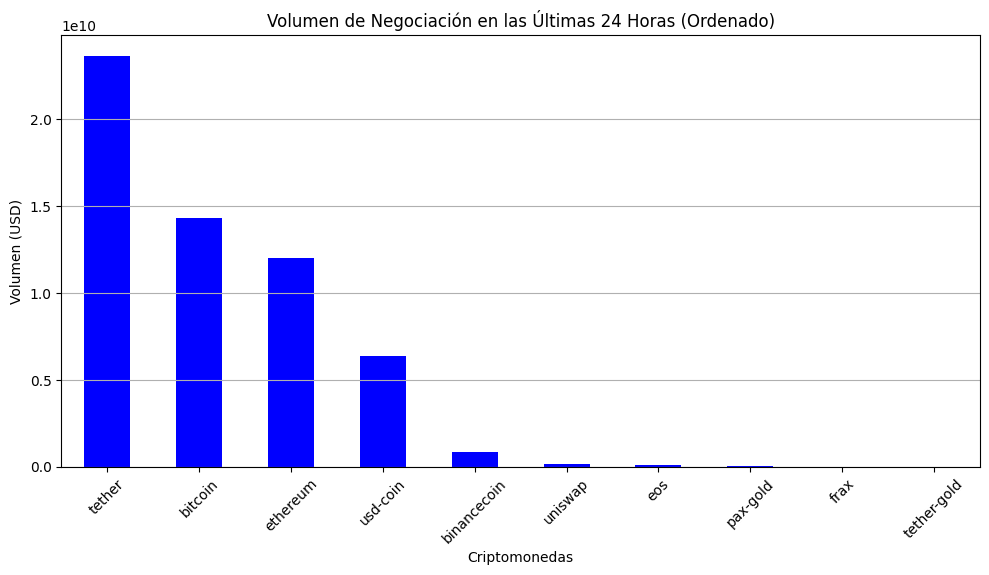

In [54]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por el volumen de negociación en orden descendente
df_sorted = df.sort_values(by='usd_24h_vol', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
df_sorted['usd_24h_vol'].plot(kind='bar', color='blue')

plt.title('Volumen de Negociación en las Últimas 24 Horas (Ordenado)')
plt.xlabel('Criptomonedas')
plt.ylabel('Volumen (USD)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

In [ ]:
#Obtener el volumen de las criptomenedas de todo el 2023. En el siguiente DF, tomando todo el 2023, observamos que el volumen de negociación para
# Frax, pax-gold, tether-gold, eos y uniswap es muy alto. Se utiliza el mismo análisis que el anterior gráfico. 

In [8]:
# Importar las bibliotecas necesarias
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Definir el rango de fechas del año 2023
start_date = '01-01-2023'
end_date = '31-12-2023'

# Crear un diccionario vacío para almacenar los datos
data = {}

# Iterar sobre las criptomonedas deseadas
for coin in ['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']:
    # Obtener el suministro circulante y el suministro total de la criptomoneda
    supply = cg.get_coin_by_id(id=coin, localization=False, tickers=False, market_data=True, community_data=False, developer_data=False, sparkline=False)
    # Extraer los datos del suministro y convertirlos en una serie de pandas
    supply = pd.Series(data=[supply['market_data']['circulating_supply'], supply['market_data']['total_supply']], index=['circulating_supply', 'total_supply'])
    # Renombrar la serie con el nombre de la criptomoneda
    supply.name = coin
    # Añadir la serie al diccionario
    data[coin] = supply

# Convertir el diccionario en un dataframe de pandas
Volumen2023 = pd.DataFrame.from_dict(data)

# Formatear los valores en notación decimal estándar
Volumen2023 = Volumen2023.applymap('{:,.4f}'.format)

# Guardar el Df en un CSV
df.to_csv('Volumen_2023.csv')

# Mostrar el dataframe
print(Volumen2023)

NameError: name 'df' is not defined

In [ ]:
#Volumen circulante y Total de Criptomonedaas de 2023. 
# Los suministros circulantes y totales de una criptomoneda se refieren a la cantidad de monedas que están actualmente en circulación y 
# la cantidad total de monedas que existen, respectivamente, en un momento dado.
# El suministro circulante se refiere a la cantidad de monedas que están actualmente en manos de los inversores y disponibles para su uso en
# transacciones . El suministro total, por otro lado, se refiere a la cantidad total de monedas que existen en el mercado, incluidas las monedas 
# que aún no se han minado o acuñado .
# El suministro circulante es importante porque puede afectar el precio de una criptomoneda. Si el suministro circulante es bajo y la demanda es 
# alta, el precio de la criptomoneda puede aumentar debido a la escasez percibida . Por otro lado, si el suministro circulante es alto y la 
# demanda es baja, el precio de la criptomoneda puede disminuir debido al exceso de oferta.
#En este gráfico, observamos que Tether es por mucho, la criptomoneda que destaca en el último año, seguda de lejos por Usd_Coin

<Figure size 1000x3000 with 0 Axes>

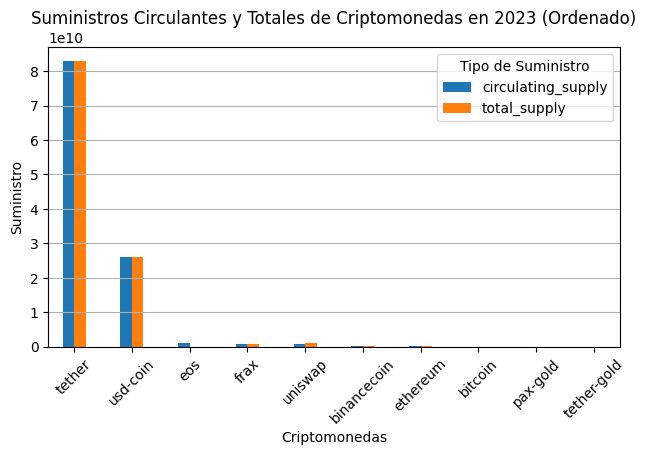

                      usd   usd_24h_vol
binancecoin    219.900000  5.202661e+08
bitcoin      26503.000000  1.611166e+10
eos              0.591341  8.295358e+07
ethereum      1671.800000  8.990502e+09
frax             0.998167  1.233116e+07
pax-gold      1907.180000  8.421604e+06
tether           0.999701  1.863483e+10
tether-gold   1919.220000  3.770838e+06
uniswap          4.760000  1.044682e+08
usd-coin         0.999848  5.084623e+09


In [9]:
import matplotlib.pyplot as plt

# Transponer el DataFrame para que las criptomonedas estén en el eje x
Volumen2023_T = Volumen2023.transpose()

# Eliminar las comas de los valores y convertirlos a números flotantes
Volumen2023_T = Volumen2023_T.apply(lambda x: x.str.replace(',', '').astype(float))

# Ordenar el DataFrame por el suministro circulante en orden descendente
Volumen2023_T_sorted = Volumen2023_T.sort_values(by='circulating_supply', ascending=False)

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(10, 30))  # Tamaño del gráfico
Volumen2023_T_sorted.plot(kind='bar', width=0.4)

plt.title('Suministros Circulantes y Totales de Criptomonedas en 2023 (Ordenado)')
plt.xlabel('Criptomonedas')
plt.ylabel('Suministro')
plt.grid(True, axis='y')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.legend(title='Tipo de Suministro')
plt.show()
cg = CoinGeckoAPI()

# Obtener el volumen de las últimas 24 horas de las criptomonedas
data = cg.get_price(ids=['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold'], vs_currencies='usd', include_24hr_vol=True)

# Convertir el diccionario a un df de Pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Guardar el Df en un CSV
df.to_csv('Volumen_Actual.csv')

# Show the dataframe
print(df)

In [ ]:
# KPI para obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses. Esto nos da una medida importante del tamaño y la salud 
# del mercado de cada criptomoneda. Cuanto mayor es, mayor mercado tiene.

In [62]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Crear una instancia de la clase CoinGeckoAPI
cg = CoinGeckoAPI()

# Lista de criptomonedas deseadas
cryptos = ['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Obtener la capitalización del mercado de las criptomonedas en dólares estadounidenses
data = cg.get_price(ids=cryptos, vs_currencies='usd', include_market_cap=True)

# Convertir el diccionario en un dataframe de pandas
df = pd.DataFrame.from_dict(data, orient='index')

# Guardar el Df en un CSV
df.to_csv('capitalización_mercado.csv')

# Mostrar el dataframe
print(df)

                      usd  usd_market_cap
binancecoin    214.960000    3.308353e+10
bitcoin      25999.000000    5.062861e+11
eos              0.582780    6.509457e+08
ethereum      1645.720000    1.979412e+11
frax             0.997796    8.052132e+08
pax-gold      1899.710000    4.733194e+08
tether           0.999802    8.283185e+10
tether-gold   1904.770000    4.696264e+08
uniswap          4.710000    3.553344e+09
usd-coin         1.000000    2.592388e+10


In [ ]:
#Grafico la relación entre el precio y la capitalización de mercado de las criptomonedas. Esto se utiliza como un indicador de la confianza 
# del mercado en las criptomonedas en general. Teniendo esto en cuenta, Bitcoin es por lejos, la que mayor confianza tiene seguida por Ethereum.

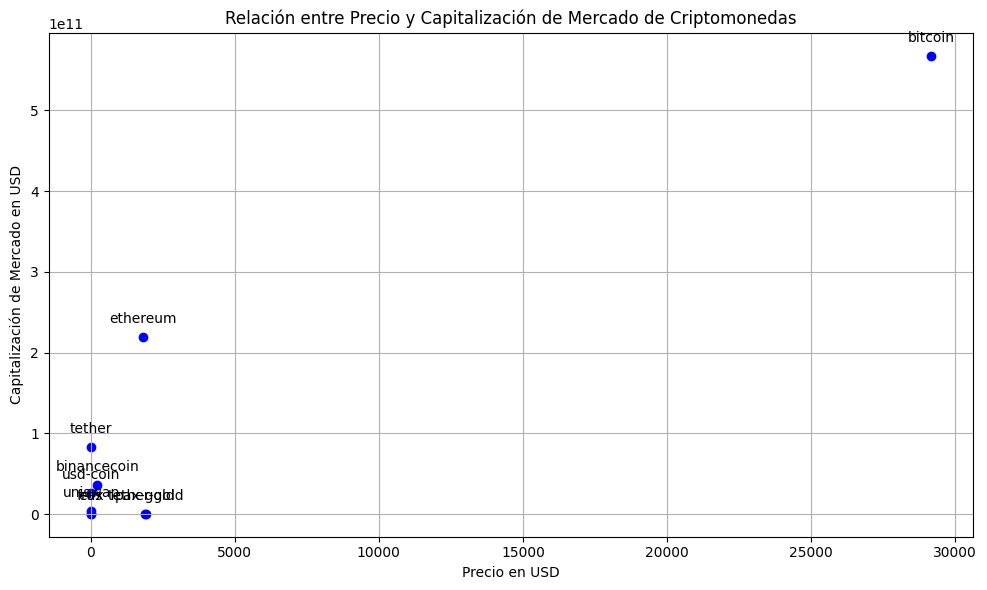

In [63]:
import matplotlib.pyplot as plt

# Datos de las criptomonedas
data = {
    'binancecoin': {'usd': 234.640000, 'usd_market_cap': 3.609333e+10},
    'bitcoin': {'usd': 29167.000000, 'usd_market_cap': 5.675414e+11},
    'uniswap': {'usd': 18.400000, 'usd_market_cap': 3.856365e+09},
    'eos': {'usd': 0.672075, 'usd_market_cap': 7.505266e+08},
    'ethereum': {'usd': 1825.100000, 'usd_market_cap': 2.192424e+11},
    'frax': {'usd': 0.998176, 'usd_market_cap': 8.111459e+08},
    'pax-gold': {'usd': 1900.950000, 'usd_market_cap': 4.719830e+08},
    'tether': {'usd': 0.999014, 'usd_market_cap': 8.307416e+10},
    'tether-gold': {'usd': 1906.570000, 'usd_market_cap': 4.699506e+08},
    'usd-coin': {'usd': 1.000000, 'usd_market_cap': 2.603325e+10}
}

# Crear listas separadas para los valores de precio y capitalización de mercado
prices = [data[coin]['usd'] for coin in data]
market_caps = [data[coin]['usd_market_cap'] for coin in data]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.scatter(prices, market_caps, marker='o', color='blue')

plt.title('Relación entre Precio y Capitalización de Mercado de Criptomonedas')
plt.xlabel('Precio en USD')
plt.ylabel('Capitalización de Mercado en USD')
plt.grid(True)
plt.tight_layout()

# Etiquetar cada punto con el nombre de la criptomoneda
for i, coin in enumerate(data):
    plt.annotate(coin, (prices[i], market_caps[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

In [ ]:
# Obtener el ranking actual, el Precio (USD), la Capitalización de Mercado (USD) y el Volumen de 24 horas (USD) de las criptomonedas.

In [68]:
import requests
import pandas as pd

# Lista de criptomonedas a buscar
cryptos = ['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# URL base de la API de CoinGecko
base_url = "https://api.coingecko.com/api/v3"

# Crear listas para almacenar los datos
rankings = []
precios = []
market_caps = []
volumenes = []

# Obtener los datos de cada criptomoneda
for crypto in cryptos:
    url = f"{base_url}/coins/{crypto}"
    response = requests.get(url)
    data = response.json()

    if 'market_cap_rank' in data:
        rankings.append(data['market_cap_rank'])
        precios.append(data['market_data']['current_price']['usd'])
        market_caps.append(data['market_data']['market_cap']['usd'])
        volumenes.append(data['market_data']['total_volume']['usd'])
    else:
        rankings.append(None)
        precios.append(None)
        market_caps.append(None)
        volumenes.append(None)

# Crear un DataFrame
df = pd.DataFrame({
    'Crypto': cryptos,
    'Ranking': rankings,
    'Precio (USD)': precios,
    'Capitalización de Mercado (USD)': market_caps,
    'Volumen de 24 horas (USD)': volumenes
})

# Guardar el DataFrame en un archivo CSV
df.to_csv('Datos_Criptomonedas.csv', index=False)

# Mostrar el DataFrame
print(df)

        Crypto  Ranking  Precio (USD)  Capitalización de Mercado (USD)  \
0     ethereum        2   1642.820000                     197468931419   
1      bitcoin        1  25953.000000                     505214639653   
2      uniswap       21      4.700000                       3545521074   
3       tether        3      0.999483                      82810534883   
4  binancecoin        4    214.650000                      33037282687   
5          eos       58      0.582049                        650276006   
6         frax       48      0.996939                        804268546   
7     usd-coin        6      0.999786                      25898266310   
8     pax-gold       78   1899.860000                        473021205   
9  tether-gold       81   1904.910000                        469636841   

   Volumen de 24 horas (USD)  
0                 7193726169  
1                12501996700  
2                  134206316  
3                23808222064  
4                  795496122  

In [ ]:
# Gráfico que mide el rendimiento general de las criptomonedas. 

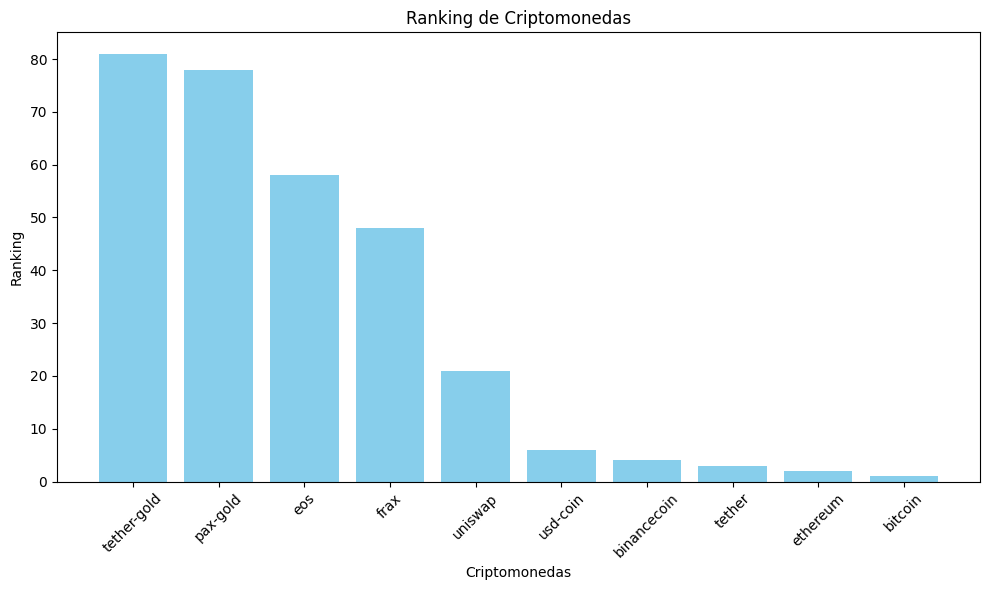

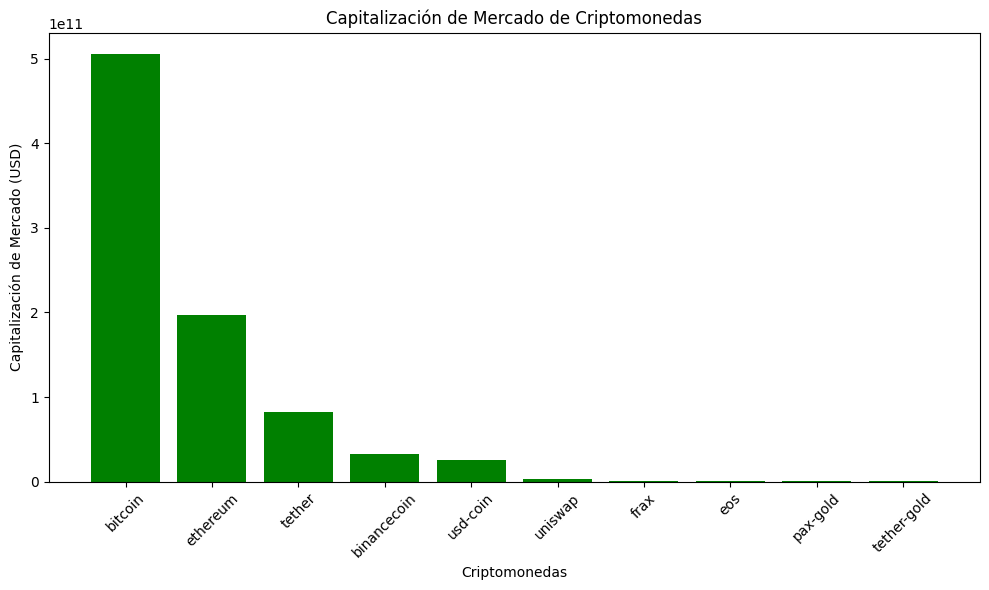

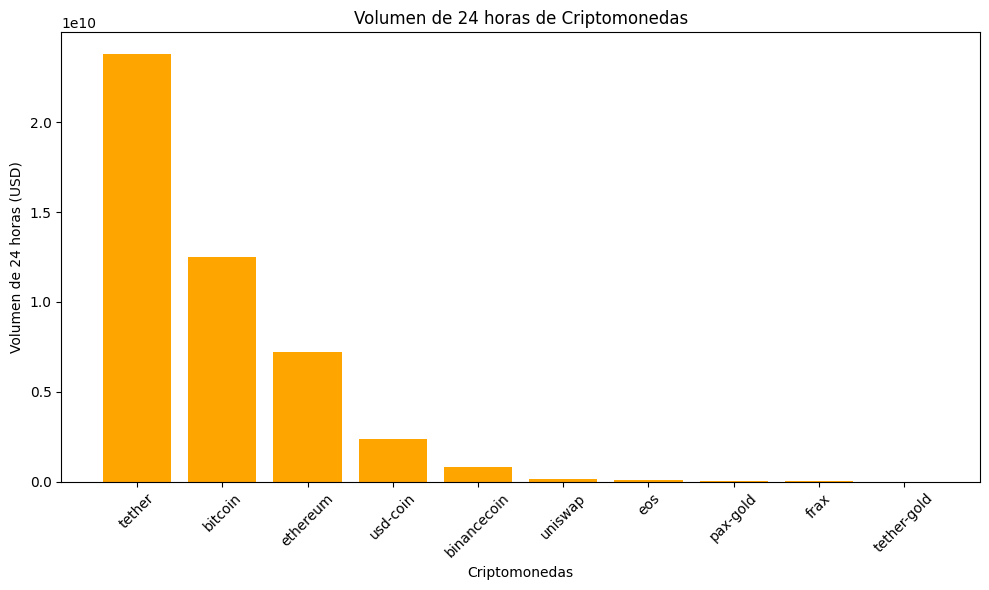

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('Datos_Criptomonedas.csv')

# Ordenar el DataFrame por ranking de mayor a menor
df = df.sort_values(by='Ranking', ascending=False)

# Graficar el ranking de las criptomonedas
plt.figure(figsize=(10, 6))
plt.bar(df['Crypto'], df['Ranking'], color='skyblue')
plt.title('Ranking de Criptomonedas')
plt.xlabel('Criptomonedas')
plt.ylabel('Ranking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ordenar el DataFrame por capitalización de mercado de mayor a menor
df = df.sort_values(by='Capitalización de Mercado (USD)', ascending=False)

# Graficar la capitalización de mercado de las criptomonedas
plt.figure(figsize=(10, 6))
plt.bar(df['Crypto'], df['Capitalización de Mercado (USD)'], color='green')
plt.title('Capitalización de Mercado de Criptomonedas')
plt.xlabel('Criptomonedas')
plt.ylabel('Capitalización de Mercado (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ordenar el DataFrame por volumen de 24 horas de mayor a menor
df = df.sort_values(by='Volumen de 24 horas (USD)', ascending=False)

# Graficar el volumen de 24 horas de las criptomonedas
plt.figure(figsize=(10, 6))
plt.bar(df['Crypto'], df['Volumen de 24 horas (USD)'], color='orange')
plt.title('Volumen de 24 horas de Criptomonedas')
plt.xlabel('Criptomonedas')
plt.ylabel('Volumen de 24 horas (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# En el ranking, observamos que las criptomonedas que destacan, son las respaldadas por oro, junto con Eos, Frax y en menor medida Uniswap. 
# En la Capitalizaicón de Mercado observamos mejor salud en Bitcoin, Ethereum y Tether, seguido en menor medida por Binancecoin y Usd-Coin. 
# Finalmente en el Volumen de Negociación actual, observamos como Tether destaca por lejos seguida por Bitcoin, Ethereum y en menor medida, 
# Usd-Coin y Binancecoin. El resto no muestra Volumen relevante.

In [ ]:
#KPI: Promedio del Volumen de Mercado Promedio de la Relación Volumen / CapMercado: 0.0548

In [76]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Funciones para obtener y procesar los datos
def get_avg_price(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_market_chart_range_by_id(id=crypto, vs_currency='usd', from_timestamp=start_date, to_timestamp=end_date)
    prices = [entry[1] for entry in data['prices']]
    avg_price = sum(prices) / len(prices)
    return avg_price

def get_crypto_info(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_by_id(id=crypto)
    return {
        "Cryptocurrency": crypto.capitalize(),
        "Ranking": data['market_cap_rank'],
        "Precio actual (USD)": data['market_data']['current_price']['usd'],
        "Capitalización de mercado (USD)": data['market_data']['market_cap']['usd'],
        "Volumen de operaciones en 24 horas (USD)": data['market_data']['total_volume']['usd']
    }

# Lista de criptomonedas
cryptos = ['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Rango de fechas
start_date = int(pd.Timestamp('2023-01-01').timestamp())
end_date = int(pd.Timestamp('2023-12-31').timestamp())

# Crear DataFrames
avg_prices_data = []
info_data = []

for crypto in cryptos:
    avg_price = get_avg_price(crypto)
    avg_prices_data.append({"Cryptocurrency": crypto.capitalize(), "Precio promedio último año (USD)": avg_price})
    info_data.append(get_crypto_info(crypto))

# Crear DataFrames a partir de los datos
df_avg_prices = pd.DataFrame(avg_prices_data)
df_info = pd.DataFrame(info_data)

# Combina los DataFrames en uno solo usando 'Cryptocurrency' como clave
final_df = pd.merge(df_avg_prices, df_info, on="Cryptocurrency")

# Calcular la relación entre Volumen de operaciones en 24 horas y Capitalización de mercado
final_df['Relación Volumen / CapMercado'] = final_df['Volumen de operaciones en 24 horas (USD)'] / final_df['Capitalización de mercado (USD)']

# Guarda el DataFrame como un archivo CSV
final_df.to_csv("Datos_combinados.csv", index=False)

# Mostrar el DataFrame final
print(final_df)

# Calcular y mostrar el KPI promedio de la relación Volumen / CapMercado
promedio_relacion_volumen_capmercado = final_df['Relación Volumen / CapMercado'].mean()
print(f"Promedio de la Relación Volumen / CapMercado: {promedio_relacion_volumen_capmercado:.4f}")

  Cryptocurrency  Precio promedio último año (USD)  Ranking  \
0       Ethereum                       1751.719228        2   
1        Bitcoin                      26321.224408        1   
2        Uniswap                          5.782231       21   
3         Tether                          1.000649        3   
4    Binancecoin                        286.195159        4   
5            Eos                          0.944297       58   
6           Frax                          0.999490       48   
7       Usd-coin                          1.000153        6   
8       Pax-gold                       1926.561902       78   
9    Tether-gold                       1930.753218       81   

   Precio actual (USD)  Capitalización de mercado (USD)  \
0          1640.630000                     197203998907   
1         25931.000000                     504610556418   
2             4.690000                       3538016510   
3             0.999492                      82810512324   
4          

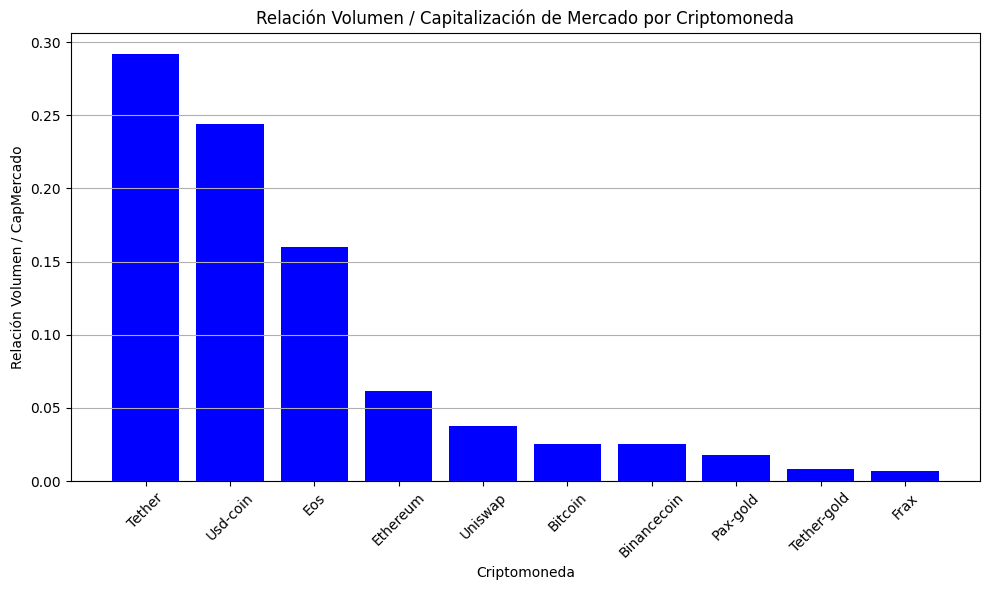

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Leer el DataFrame desde el archivo CSV
final_df = pd.read_csv("Datos_combinados.csv")

# Ordenar el DataFrame por la columna "Relación Volumen / CapMercado" de mayor a menor
final_df_sorted = final_df.sort_values(by="Relación Volumen / CapMercado", ascending=False)

# Crear un gráfico de barras para la relación Volumen / CapMercado
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(final_df_sorted["Cryptocurrency"], final_df_sorted["Relación Volumen / CapMercado"], color='blue')
plt.title('Relación Volumen / Capitalización de Mercado por Criptomoneda')
plt.xlabel('Criptomoneda')
plt.ylabel('Relación Volumen / CapMercado')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()

In [ ]:
#KPI para obtener la Criptomoneda con la Mayor Capitalización de Mercado: Bitcoin es actualmente la criptomoneda con la mayor capitalización de 
# mercado, seguida de Ethereum, Tether y Binance-Coin

In [79]:
import pandas as pd
from pycoingecko import CoinGeckoAPI

# Funciones para obtener y procesar los datos
def get_avg_price(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_market_chart_range_by_id(id=crypto, vs_currency='usd', from_timestamp=start_date, to_timestamp=end_date)
    prices = [entry[1] for entry in data['prices']]
    avg_price = sum(prices) / len(prices)
    return avg_price

def get_crypto_info(crypto):
    cg = CoinGeckoAPI()
    data = cg.get_coin_by_id(id=crypto)
    return {
        "Cryptocurrency": crypto.capitalize(),
        "Ranking": data['market_cap_rank'],
        "Precio actual (USD)": data['market_data']['current_price']['usd'],
        "Capitalización de mercado (USD)": data['market_data']['market_cap']['usd'],
        "Volumen de operaciones en 24 horas (USD)": data['market_data']['total_volume']['usd']
    }

# Lista de criptomonedas
cryptos = ['ethereum', 'bitcoin', 'uniswap', 'tether', 'binancecoin', 'eos', 'frax', 'usd-coin', 'pax-gold', 'tether-gold']

# Rango de fechas
start_date = int(pd.Timestamp('2023-01-01').timestamp())
end_date = int(pd.Timestamp('2023-12-31').timestamp())

# Crear DataFrames
avg_prices_data = []
info_data = []

for crypto in cryptos:
    avg_price = get_avg_price(crypto)
    avg_prices_data.append({"Cryptocurrency": crypto.capitalize(), "Precio promedio último año (USD)": avg_price})
    info_data.append(get_crypto_info(crypto))

# Crear DataFrames a partir de los datos
df_avg_prices = pd.DataFrame(avg_prices_data)
df_info = pd.DataFrame(info_data)

# Combina los DataFrames en uno solo usando 'Cryptocurrency' como clave
final_df = pd.merge(df_avg_prices, df_info, on="Cryptocurrency")

# Encontrar la criptomoneda con la mayor capitalización de mercado
criptomoneda_max_capmercado = final_df.loc[final_df['Capitalización de mercado (USD)'].idxmax()]

# Guarda el DataFrame como un archivo CSV
final_df.to_csv("Datos_combinados.csv", index=False)

# Mostrar el DataFrame final
print(final_df)

# Mostrar la criptomoneda con la mayor capitalización de mercado y su KPI
print("Criptomoneda con Mayor Capitalización de Mercado:")
print(criptomoneda_max_capmercado)

# Calcular y mostrar el KPI
kpi_capmercado = criptomoneda_max_capmercado['Capitalización de mercado (USD)'] / criptomoneda_max_capmercado['Volumen de operaciones en 24 horas (USD)']
print(f"KPI Capitalización / Volumen: {kpi_capmercado:.4f}")

  Cryptocurrency  Precio promedio último año (USD)  Ranking  \
0       Ethereum                       1751.719228        2   
1        Bitcoin                      26321.224408        1   
2        Uniswap                          5.782231       21   
3         Tether                          1.000649        3   
4    Binancecoin                        286.195159        4   
5            Eos                          0.944297       58   
6           Frax                          0.999490       48   
7       Usd-coin                          1.000153        6   
8       Pax-gold                       1926.561902       78   
9    Tether-gold                       1930.753218       81   

   Precio actual (USD)  Capitalización de mercado (USD)  \
0          1640.610000                     197203998907   
1         25924.000000                     504632432855   
2             4.690000                       3535677824   
3             0.999280                      82810512324   
4          

In [ ]:
#La capitalización sobre el volumen es una medida que se utiliza para evaluar la liquidez de una criptomoneda. Observamos que Frax y 
# Tether-gold destacan como las mejores, seguidas por Pax-gold, Bitcoin, Binance-coin y Uniswap

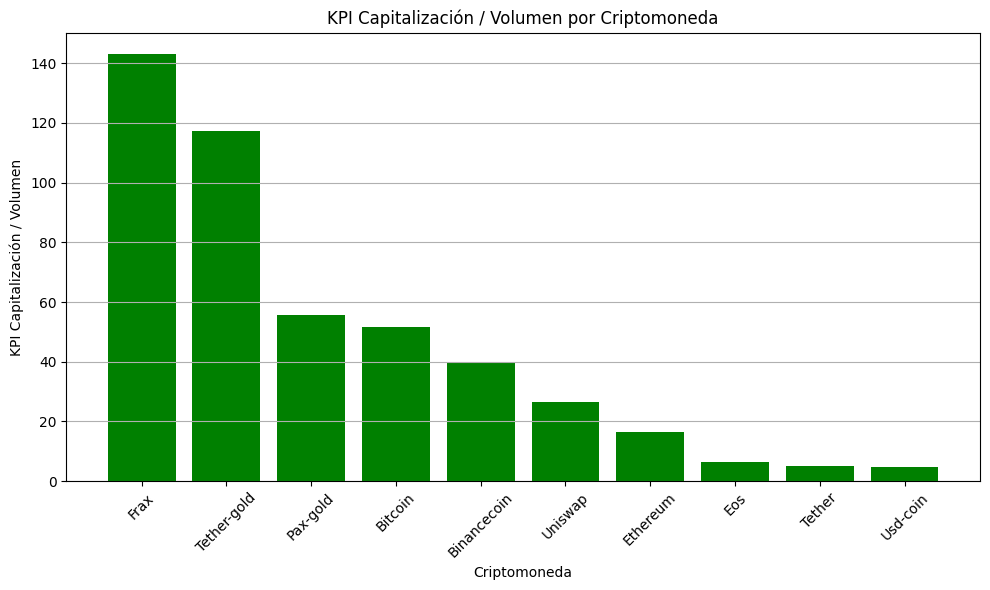

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Leer el DataFrame desde el archivo CSV
final_df = pd.read_csv("Datos_combinados.csv")

# Calcular el KPI "Capitalización / Volumen"
final_df['KPI Capitalización / Volumen'] = final_df['Capitalización de mercado (USD)'] / final_df['Volumen de operaciones en 24 horas (USD)']

# Ordenar el DataFrame por el KPI de mayor a menor
final_df_sorted = final_df.sort_values(by="KPI Capitalización / Volumen", ascending=False)

# Crear un gráfico de barras para el KPI Capitalización / Volumen
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(final_df_sorted["Cryptocurrency"], final_df_sorted["KPI Capitalización / Volumen"], color='green')
plt.title('KPI Capitalización / Volumen por Criptomoneda')
plt.xlabel('Criptomoneda')
plt.ylabel('KPI Capitalización / Volumen')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()